# 1.3 Optimization in Relation to Problem-Solving

## Contents: 
1. Import Libraries
2. Import Datasets
3. Subset
4. Budapest 2020
5. Budapest 1990
6. Budapest 1960
7. Belgrade 2020
8. Belgrade 1990
9. Belgrade 1960
10. Ljubljana 2020
11. Ljubljana 1990
12. Ljubljana 1960

## 1. Import Libraries

In [1444]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d
from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

## 2. Import Datasets

In [1446]:
# define path to dataset

path = r'/Users/analazarevska/Documents/CAREER FOUNDRY/Data Analytics Program/Machine Learning/A1, Basics of Machine Learning for Analysts/ClimateWins/Data Sets/'

# import dataset

df = pd.read_csv(os.path.join(path, 'temperature.csv'))
df_scaled = pd.read_csv(os.path.join(path, 'temperature_scaled.csv'))

In [1447]:
# check first rows of dataset

df_scaled.head()

Unnamed: 0  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0           0           0.660514          -0.02793        0.826097   
1           1           0.244897          -0.02793        0.735760   
2           2           1.076130          -0.02793        1.277781   
3           3          -1.001953          -0.02793        1.458455   
4           4           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  ...  \
0         -0.179228       -0.902918        -0.528623  ...   
1         -0.179228       -0.810126        -0.582946  ...   
2         -0.179228       -1.065304        -0.257010  ...   
3         -0.179228       -0.114186        -0.555784  ...   
4         -0.179228        0.187388        -1.003946  ...   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0             -0.443701           0.761754          -1.299744   
1              0.783085           1.183580          -1.262455   
2              0.783085           1.183580          -0.432779   
3              0.783085           0.480538           0.387574   
4             -1.670486          -0.363113           1.729970   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_snow_depth  \
0                  -0.806427               -0.088407            -0.024706   
1                  -1.042055                0.503361            -0.024706   
2                  -1.136306               -0.396127            -0.024706   
3                  -1.183432                0.669056            -0.024706   
4                  -0.794645               -0.490810            -0.024706   

   VALENTIA_sunshine  VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0           0.372147           -0.668215          -0.519743          -0.752237  
1          -0.829285           -0.548046          -0.629054          -0.407141  
2          -1.009500           -0.067372           0.054135          -0.177078  
3          -1.039536           -0.998679          -0.164486          -0.838511  
4           0.672505           -1.509396          -1.339569          -1.471186  

[5 rows x 169 columns]

## 3. Subset

In [1449]:
# create subset of mean temperatures for each station

df_sub_mean = df_scaled[['BASEL_temp_mean', 'BELGRADE_temp_mean', 'BUDAPEST_temp_mean', 'DEBILT_temp_mean', 'DUSSELDORF_temp_mean', 'GDANSK_temp_mean', 'HEATHROW_temp_mean', 'KASSEL_temp_mean', 'LJUBLJANA_temp_mean', 'MAASTRICHT_temp_mean', 'MADRID_temp_mean', 'MUNCHENB_temp_mean', 'OSLO_temp_mean', 'ROMA_temp_mean', 'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean', 'TOURS_temp_mean', 'VALENTIA_temp_mean']].copy()

In [1450]:
df_sub_mean.head()

BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  DEBILT_temp_mean  \
0        -0.528623           -1.016876           -1.099163         -0.114356   
1        -0.582946           -1.107669           -1.110927         -0.367511   
2        -0.257010           -1.084971           -1.063873         -0.509912   
3        -0.555784           -1.209812           -1.146217         -0.525734   
4        -1.003946           -1.209812           -1.087400         -0.320045   

   DUSSELDORF_temp_mean  GDANSK_temp_mean  HEATHROW_temp_mean  \
0             -0.105836         -0.927601           -0.106469   
1             -0.370915         -0.825294           -0.892676   
2             -0.532908         -0.940389           -0.490837   
3             -0.577088         -1.042696           -0.316124   
4             -0.444548         -0.978754           -0.403481   

   KASSEL_temp_mean  LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  \
0         -0.182904            -1.370824             -0.097084   
1         -0.212437            -1.043881             -0.232112   
2         -0.389635            -0.741156             -0.487164   
3         -0.493001            -0.910682             -0.472161   
4         -0.552067            -0.862246             -0.307127   

   MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0         -0.988280           -0.265742       -0.186575       -1.280450   
1         -0.691740           -0.353714       -0.368598       -0.539569   
2         -0.853490           -0.403983       -0.550620       -0.876333   
3         -0.624345           -0.642763       -0.417137       -0.775304   
4         -0.381721           -0.906678       -0.332193       -0.926848   

   SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0            -0.124331            -0.391072        -0.257321   
1            -0.650834            -0.415953        -0.335759   
2            -0.650834            -0.615003        -0.210258   
3            -0.943336            -0.764290        -0.069069   
4            -0.621584            -0.503037        -0.037694   

   VALENTIA_temp_mean  
0           -0.668215  
1           -0.548046  
2           -0.067372  
3           -0.998679  
4           -1.509396

In [1451]:
# combine date column and scaled subset

df_combined = pd.concat([df['DATE'],df_sub_mean], axis=1)

In [1452]:
df_combined.head()

DATE  BASEL_temp_mean  BELGRADE_temp_mean  BUDAPEST_temp_mean  \
0  19600101        -0.528623           -1.016876           -1.099163   
1  19600102        -0.582946           -1.107669           -1.110927   
2  19600103        -0.257010           -1.084971           -1.063873   
3  19600104        -0.555784           -1.209812           -1.146217   
4  19600105        -1.003946           -1.209812           -1.087400   

   DEBILT_temp_mean  DUSSELDORF_temp_mean  GDANSK_temp_mean  \
0         -0.114356             -0.105836         -0.927601   
1         -0.367511             -0.370915         -0.825294   
2         -0.509912             -0.532908         -0.940389   
3         -0.525734             -0.577088         -1.042696   
4         -0.320045             -0.444548         -0.978754   

   HEATHROW_temp_mean  KASSEL_temp_mean  LJUBLJANA_temp_mean  \
0           -0.106469         -0.182904            -1.370824   
1           -0.892676         -0.212437            -1.043881   
2           -0.490837         -0.389635            -0.741156   
3           -0.316124         -0.493001            -0.910682   
4           -0.403481         -0.552067            -0.862246   

   MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  OSLO_temp_mean  \
0             -0.097084         -0.988280           -0.265742       -0.186575   
1             -0.232112         -0.691740           -0.353714       -0.368598   
2             -0.487164         -0.853490           -0.403983       -0.550620   
3             -0.472161         -0.624345           -0.642763       -0.417137   
4             -0.307127         -0.381721           -0.906678       -0.332193   

   ROMA_temp_mean  SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
0       -1.280450            -0.124331            -0.391072        -0.257321   
1       -0.539569            -0.650834            -0.415953        -0.335759   
2       -0.876333            -0.650834            -0.615003        -0.210258   
3       -0.775304            -0.943336            -0.764290        -0.069069   
4       -0.926848            -0.621584            -0.503037        -0.037694   

   VALENTIA_temp_mean  
0           -0.668215  
1           -0.548046  
2           -0.067372  
3           -0.998679  
4           -1.509396

In [1453]:
# look at a whisker plot of the data to see variations in temperatures

df_sub_mean.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

In [1454]:
# reduce the dataset to a single year

df_year_20 = df_combined.loc[df_combined['DATE'].astype(str).str[:4] == '2020']
df_year_90 = df_combined.loc[df_combined['DATE'].astype(str).str[:4] == '1990']
df_year_60 = df_combined.loc[df_combined['DATE'].astype(str).str[:4] == '1960']

In [1455]:
# drop the DATE as those numbers are not scaled with the rest

df_year_20_nodate = df_year_20.drop(['DATE'], axis=1)

In [1456]:
# plot all weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

fig = go.Figure(data=[go.Surface(z=df_year_20_nodate.values)])
fig.update_layout(title='Temperatures over time', autosize=False, width=600, height=600)
fig.show()

In [1457]:
# make index for the year with 366 days

i_366 = np.arange(0.01,3.67,0.01)
index_366 = pd.DataFrame(data = i_366, columns = ['index'])
index_366

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [1458]:
# make index for the year with 365 days

i_365 = np.arange(0.01,3.66,0.01)
index_365 = pd.DataFrame(data = i_365, columns = ['index'])
index_365

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
360   3.61
361   3.62
362   3.63
363   3.64
364   3.65

[365 rows x 1 columns]

## 4. Budapest 2020

In [1460]:
# rows for year 2020

n_rows_20 = df_year_20.shape[0]
n_rows_20

366

In [1461]:
# translate the chosen weather data into the X and y datasets needed for the optimisation function

X=index_366.to_numpy().reshape(n_rows_20,1)

# represent x_0 as a vector of 1s for vector computation

ones = np.ones((n_rows_20,1))
X = np.concatenate((ones, X), axis=1)
y=df_year_20['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows_20,1)

In [1462]:
X.shape, y.shape

((366, 2), (366, 1))

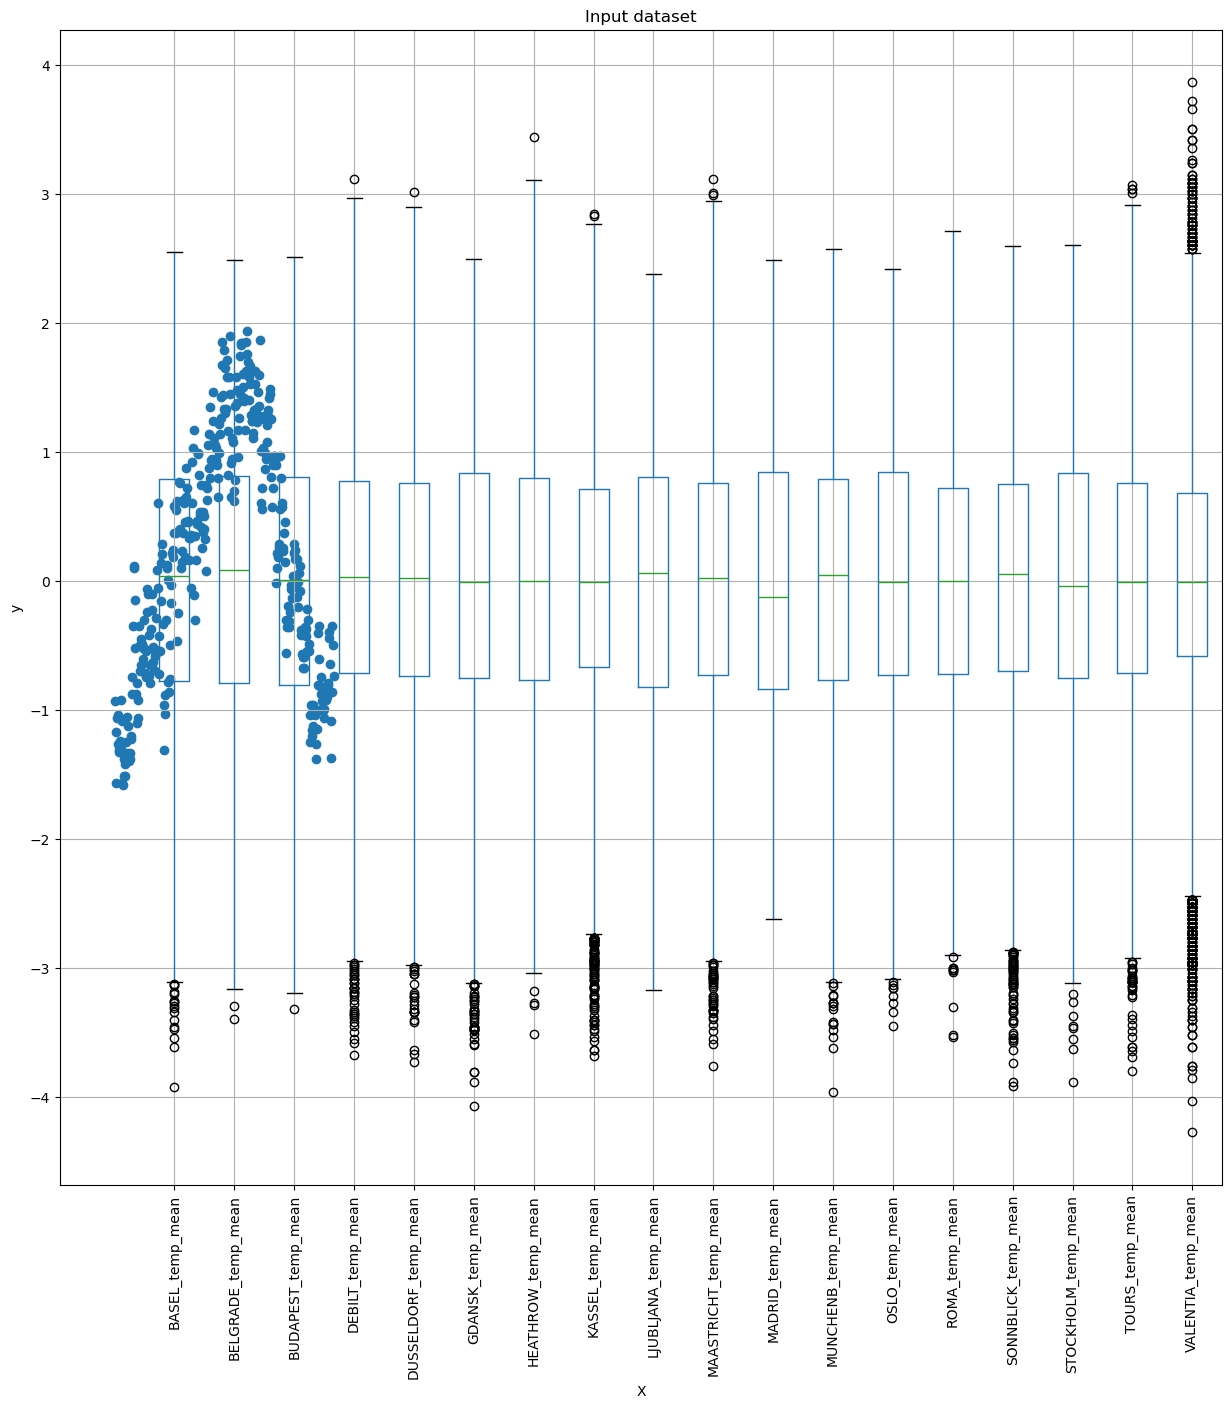

In [1463]:
# look at one year of temperature data over time

plt.scatter(x=index_366['index'], y=df_year_20['BUDAPEST_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

plt.show()

In [1464]:
# check the min temperature

df_year_20['BUDAPEST_temp_mean'].min()

-1.5814626992647445

In [1465]:
# check the max temperature

df_year_20['BUDAPEST_temp_mean'].max()

1.9357948558790756

In [1466]:
# compute the loss function for the gradiant descent

def compute_cost(X, y, theta=np.array([[0],[0]])):
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [1467]:
compute_cost(X,y)

array([0.44029615])

In [1468]:
# gradiant descent function

def gradient_descent(X, y, theta=np.array([[0],[0]]), alpha=0.01, num_iterations=1500):
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        
        # print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [1469]:
%%time

# run the data through a gradiant descent for the starting conditions in 'theta_init'

num_iterations=20
theta_init=np.array([[2],[1]])
alpha=0.1
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init, alpha, num_iterations)

CPU times: user 19.5 ms, sys: 1.45 ms, total: 20.9 ms
Wall time: 8.42 ms


In [1470]:
theta

array([[ 0.85632062],
       [-0.26313477]])

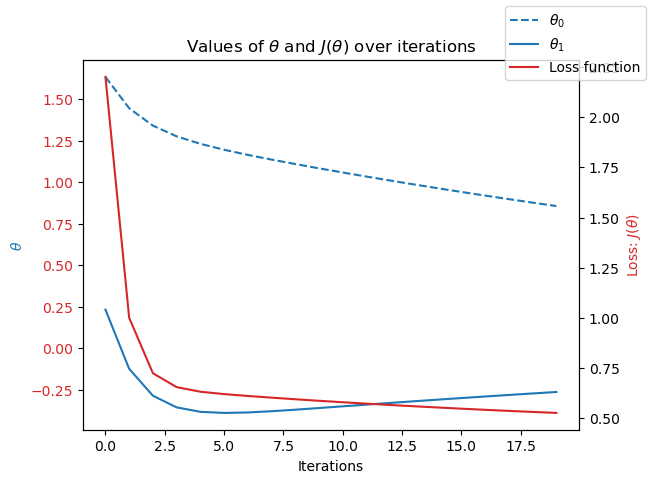

In [1471]:
# plot the loss, theta0, and theta1

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [1472]:
%%time

# theta range
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-10,10,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0

CPU times: user 1.55 s, sys: 32.2 ms, total: 1.58 s
Wall time: 1.22 s


In [1473]:
# show the loss function

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True, width=600, height=600, xaxis_title='theta0',  yaxis_title='theta1')
fig.show()

In [1474]:
# as above but with the line the loss function takes toward the minimum

#X = Theta0
#Y - Theta1
#Z = Loss

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')

# add graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True, width=600, height=600, xaxis_title='theta0',  yaxis_title='theta1')
fig.show()

In [1475]:
# rerun the optimization start closer to the objective

num_iterations=50
theta_init=np.array([[1],[1]])
alpha= 0.05
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init, alpha, num_iterations)

In [1476]:
# the new loss path on the function

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')

# add graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True, width=600, height=600, xaxis_title='theta0',  yaxis_title='theta1')
fig.show()

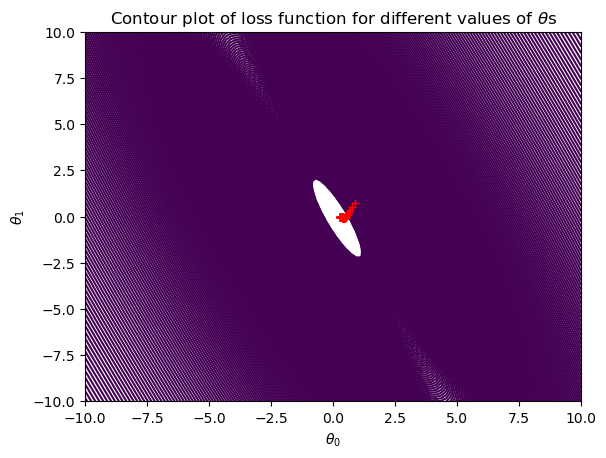

In [1477]:
# show the convergence only in the X/Y plane

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

## 5. Budapest 1990

In [1479]:
# rows for year 1990

n_rows_90 = df_year_90.shape[0]
n_rows_90

365

In [1480]:
# translate the chosen weather data into the X and y datasets needed for the optimisation function

X=index_365.to_numpy().reshape(n_rows_90,1)

# represent x_0 as a vector of 1s for vector computation

ones = np.ones((n_rows_90,1))
X = np.concatenate((ones, X), axis=1)
y=df_year_90['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows_90,1)

In [1481]:
X.shape, y.shape

((365, 2), (365, 1))

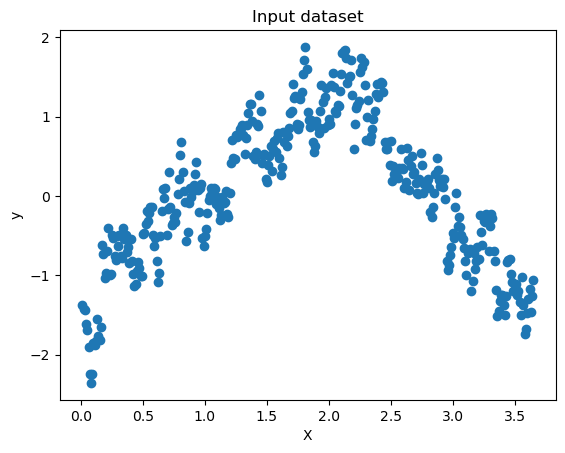

In [1482]:
# look at one year of temperature data over time

plt.scatter(x=index_365['index'], y=df_year_90['BUDAPEST_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

plt.show()

In [1483]:
# check the min temperature

df_year_90['BUDAPEST_temp_mean'].min()

-2.357847310099167

In [1484]:
# check the max temperature

df_year_90['BUDAPEST_temp_mean'].max()

1.8769778399067711

In [1485]:
# compute the loss function for the gradiant descent

def compute_cost(X, y, theta=np.array([[0],[0]])):
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [1486]:
compute_cost(X, y)

array([0.41038062])

In [1487]:
# gradiant descent function

def gradient_descent(X, y, theta=np.array([[0],[0]]), alpha=0.01, num_iterations=1500):
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        
        # print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [1488]:
%%time

# run the data through a gradiant descent for the starting conditions in 'theta_init'

num_iterations=30
theta_init=np.array([[2],[2]])
alpha=0.08
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init, alpha, num_iterations)

CPU times: user 29.9 ms, sys: 1.48 ms, total: 31.4 ms
Wall time: 11.9 ms


In [1489]:
theta

array([[ 0.54838777],
       [-0.21166859]])

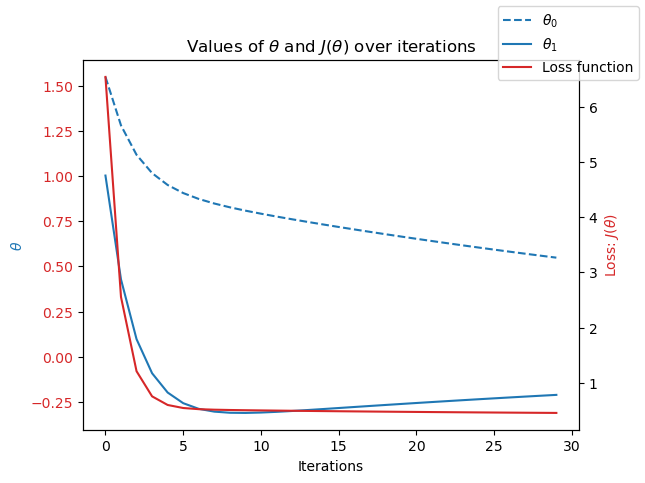

In [1490]:
# plot the loss, theta0, and theta1

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [1491]:
%%time

# theta range
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-10,10,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0

CPU times: user 1.53 s, sys: 39.7 ms, total: 1.57 s
Wall time: 1.22 s


In [1492]:
# show the loss function

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True, width=600, height=600, xaxis_title='theta0',  yaxis_title='theta1')
fig.show()

## 6. Budapest 1960

In [1494]:
# rows for year 1960

n_rows_60 = df_year_60.shape[0]
n_rows_60

366

In [1495]:
# translate the chosen weather data into the X and y datasets needed for the optimisation function

X=index_366.to_numpy().reshape(n_rows_60,1)

# represent x_0 as a vector of 1s for vector computation

ones = np.ones((n_rows_60,1))
X = np.concatenate((ones, X), axis=1)
y=df_year_60['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows_60,1)

In [1496]:
X.shape, y.shape

((366, 2), (366, 1))

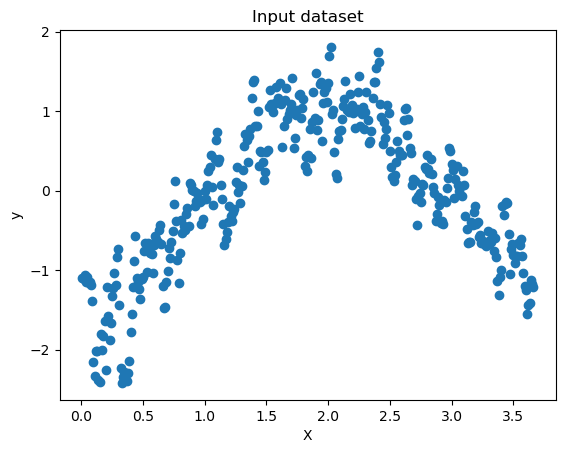

In [1497]:
# look at one year of temperature data over time

plt.scatter(x=index_366['index'], y=df_year_60['BUDAPEST_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

plt.show()

In [1498]:
# check the min temperature

df_year_60['BUDAPEST_temp_mean'].min()

-2.4166643260714715

In [1499]:
# check the max temperature

df_year_60['BUDAPEST_temp_mean'].max()

1.8063974207400055

In [1500]:
# compute the loss function for the gradiant descent

def compute_cost(X, y, theta=np.array([[0],[0]])):
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [1501]:
compute_cost(X, y)

array([0.44887979])

In [1502]:
# gradiant descent function

def gradient_descent(X, y, theta=np.array([[0],[0]]), alpha=0.01, num_iterations=1500):
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        
        # print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [1503]:
%%time

# run the data through a gradiant descent for the starting conditions in 'theta_init'

num_iterations=20
theta_init=np.array([[2],[1]])
alpha=0.09
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init, alpha, num_iterations)

CPU times: user 26.6 ms, sys: 2.1 ms, total: 28.7 ms
Wall time: 9.15 ms


In [1504]:
theta

array([[ 0.72948031],
       [-0.28305741]])

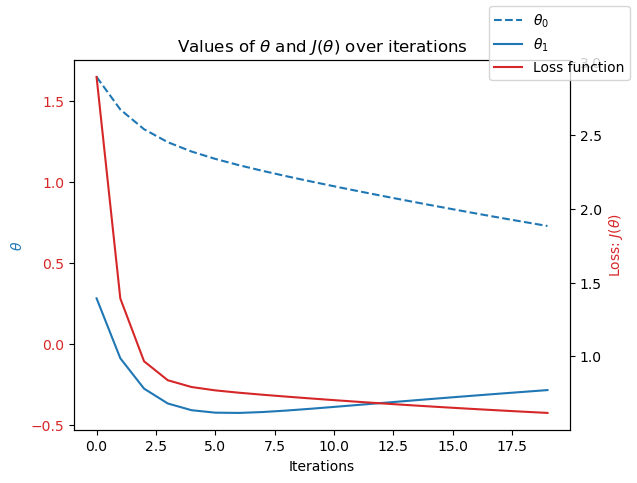

In [1505]:
# plot the loss, theta0, and theta1

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [1506]:
%%time

# theta range
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-10,10,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0

CPU times: user 1.49 s, sys: 32.4 ms, total: 1.53 s
Wall time: 1.18 s


In [1507]:
# show the loss function

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True, width=600, height=600, xaxis_title='theta0',  yaxis_title='theta1')
fig.show()

## 7. Belgrade 2020

In [1509]:
# translate the chosen weather data into the X and y datasets needed for the optimisation function

X=index_366.to_numpy().reshape(n_rows_20,1)

# represent x_0 as a vector of 1s for vector computation

ones = np.ones((n_rows_20,1))
X = np.concatenate((ones, X), axis=1)
y=df_year_20['BELGRADE_temp_mean'].to_numpy().reshape(n_rows_20,1)

In [1510]:
X.shape, y.shape

((366, 2), (366, 1))

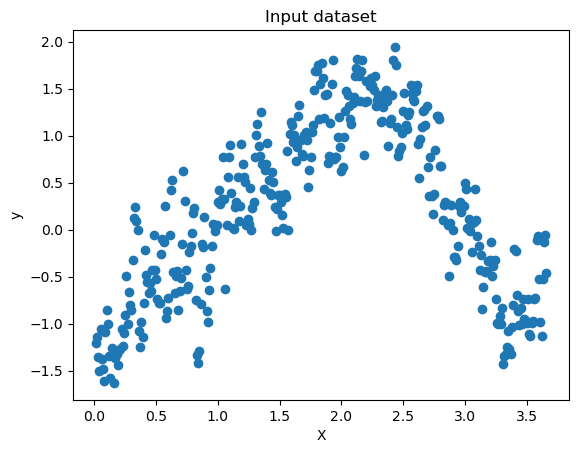

In [1511]:
# look at one year of temperature data over time

plt.scatter(x=index_366['index'], y=df_year_20['BELGRADE_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

plt.show()

In [1512]:
# check the min temperature

df_year_20['BELGRADE_temp_mean'].min()

-1.6297300562573998

In [1513]:
# check the max temperature

df_year_20['BELGRADE_temp_mean'].max()

1.9452511715289424

In [1514]:
# compute the loss function for the gradiant descent

def compute_cost(X, y, theta=np.array([[0],[0]])):
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [1515]:
compute_cost(X, y)

array([0.43639184])

In [1516]:
# gradiant descent function

def gradient_descent(X, y, theta=np.array([[0],[0]]), alpha=0.01, num_iterations=1500):
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        
        # print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [1517]:
%%time

# run the data through a gradiant descent for the starting conditions in 'theta_init'

num_iterations=10
theta_init=np.array([[1],[1]])
alpha=0.05
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init, alpha, num_iterations)

CPU times: user 11.7 ms, sys: 709 μs, total: 12.4 ms
Wall time: 4.14 ms


In [1518]:
theta

array([[ 0.48096044],
       [-0.02568489]])

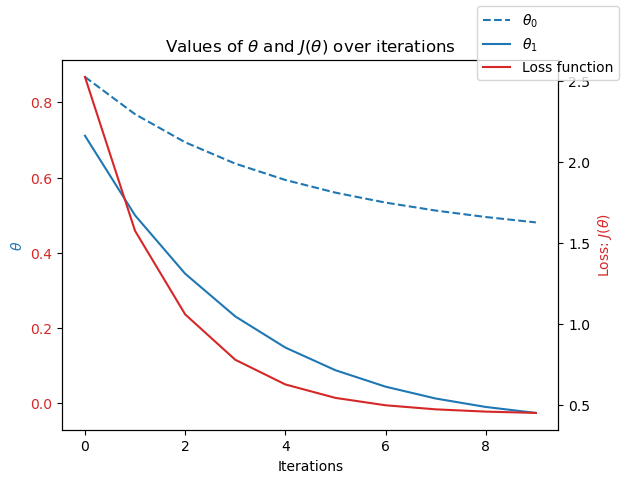

In [1519]:
# plot the loss, theta0, and theta1

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [1520]:
%%time

# theta range
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-10,10,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0

CPU times: user 1.24 s, sys: 44.4 ms, total: 1.28 s
Wall time: 1.22 s


In [1521]:
# show the loss function

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True, width=600, height=600, xaxis_title='theta0',  yaxis_title='theta1')
fig.show()

## 8. Belgrade 1990

In [1523]:
# translate the chosen weather data into the X and y datasets needed for the optimisation function

X=index_365.to_numpy().reshape(n_rows_90,1)

# represent x_0 as a vector of 1s for vector computation

ones = np.ones((n_rows_90,1))
X = np.concatenate((ones, X), axis=1)
y=df_year_90['BELGRADE_temp_mean'].to_numpy().reshape(n_rows_90,1)

In [1524]:
X.shape, y.shape

((365, 2), (365, 1))

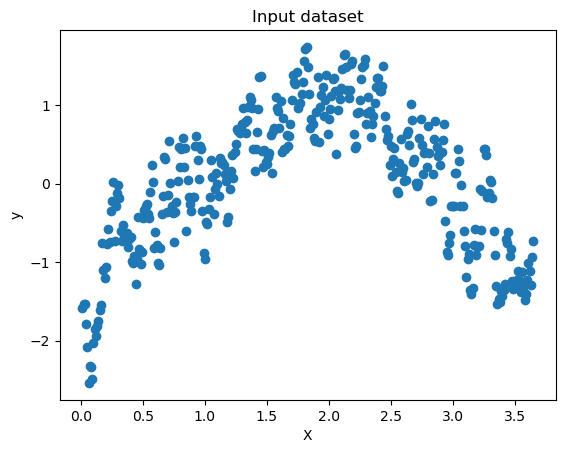

In [1525]:
# look at one year of temperature data over time

plt.scatter(x=index_365['index'], y=df_year_90['BELGRADE_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

plt.show()

In [1526]:
# check the min temperature

df_year_90['BELGRADE_temp_mean'].min()

-2.5376617966475816

In [1527]:
# check the max temperature

df_year_90['BELGRADE_temp_mean'].max()

1.7409665299411512

In [1528]:
# compute the loss function for the gradiant descent

def compute_cost(X, y, theta=np.array([[0],[0]])):
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [1529]:
compute_cost(X, y)

array([0.40332895])

In [1530]:
# gradiant descent function

def gradient_descent(X, y, theta=np.array([[0],[0]]), alpha=0.01, num_iterations=1500):
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        
        # print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [1531]:
%%time

# run the data through a gradiant descent for the starting conditions in 'theta_init'

num_iterations=10
theta_init=np.array([[-1],[-1]])
alpha=0.1
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init, alpha, num_iterations)

CPU times: user 15.1 ms, sys: 1.28 ms, total: 16.4 ms
Wall time: 5.22 ms


In [1532]:
theta

array([[-0.40045976],
       [ 0.20975368]])

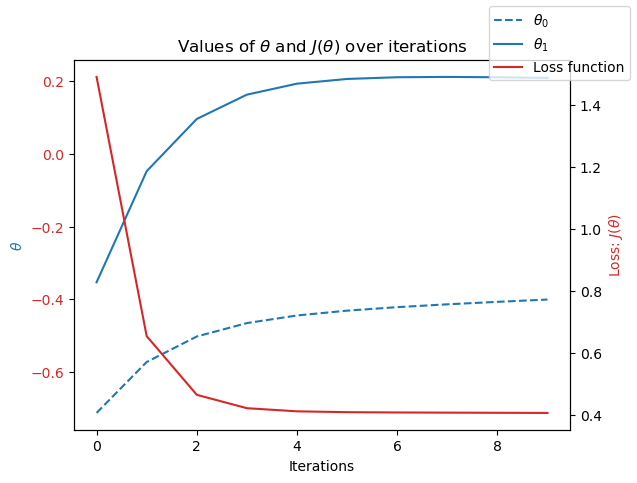

In [1533]:
# plot the loss, theta0, and theta1

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [1534]:
%%time

# theta range
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-10,10,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0

CPU times: user 1.5 s, sys: 30.5 ms, total: 1.53 s
Wall time: 1.17 s


In [1535]:
# show the loss function

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True, width=600, height=600, xaxis_title='theta0',  yaxis_title='theta1')
fig.show()

## 9. Belgrade 1960

In [1537]:
# translate the chosen weather data into the X and y datasets needed for the optimisation function

X=index_366.to_numpy().reshape(n_rows_60,1)

# represent x_0 as a vector of 1s for vector computation

ones = np.ones((n_rows_60,1))
X = np.concatenate((ones, X), axis=1)
y=df_year_60['BELGRADE_temp_mean'].to_numpy().reshape(n_rows_60,1)

In [1538]:
X.shape, y.shape

((366, 2), (366, 1))

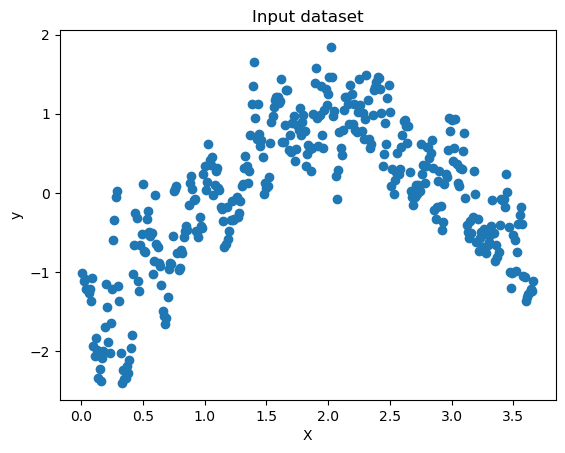

In [1539]:
# look at one year of temperature data over time

plt.scatter(x=index_366['index'], y=df_year_60['BELGRADE_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

plt.show()

In [1540]:
# check the min temperature

df_year_60['BELGRADE_temp_mean'].min()

-2.401472035589055

In [1541]:
# check the max temperature

df_year_60['BELGRADE_temp_mean'].max()

1.8431088507350464

In [1542]:
# compute the loss function for the gradiant descent

def compute_cost(X, y, theta=np.array([[0],[0]])):
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [1543]:
compute_cost(X, y)

array([0.42281659])

In [1544]:
# gradiant descent function

def gradient_descent(X, y, theta=np.array([[0],[0]]), alpha=0.01, num_iterations=1500):
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        
        # print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [1545]:
%%time

# run the data through a gradiant descent for the starting conditions in 'theta_init'

num_iterations=10
theta_init=np.array([[1],[1]])
alpha=0.1
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init, alpha, num_iterations)

CPU times: user 13.1 ms, sys: 919 μs, total: 14 ms
Wall time: 4.26 ms


In [1546]:
theta

array([[ 0.28880914],
       [-0.07187827]])

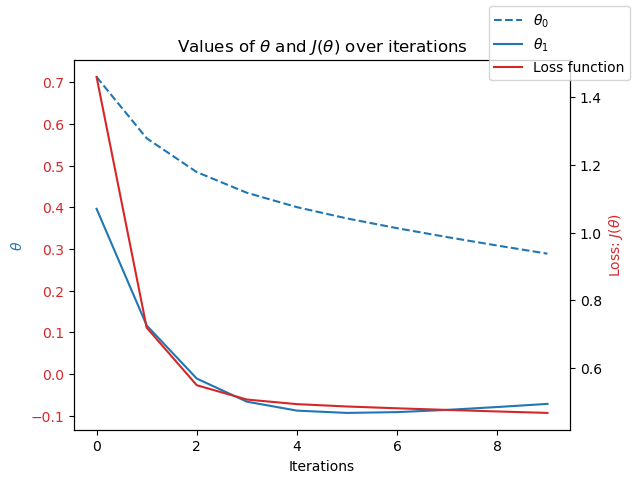

In [1547]:
# plot the loss, theta0, and theta1

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [1548]:
%%time

# theta range
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-10,10,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0

CPU times: user 1.5 s, sys: 26.8 ms, total: 1.52 s
Wall time: 1.16 s


In [1549]:
# show the loss function

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True, width=600, height=600, xaxis_title='theta0',  yaxis_title='theta1')
fig.show()

## 10. Ljubljana 2020

In [1551]:
# translate the chosen weather data into the X and y datasets needed for the optimisation function

X=index_366.to_numpy().reshape(n_rows_20,1)

# represent x_0 as a vector of 1s for vector computation

ones = np.ones((n_rows_20,1))
X = np.concatenate((ones, X), axis=1)
y=df_year_20['LJUBLJANA_temp_mean'].to_numpy().reshape(n_rows_20,1)

In [1552]:
X.shape, y.shape

((366, 2), (366, 1))

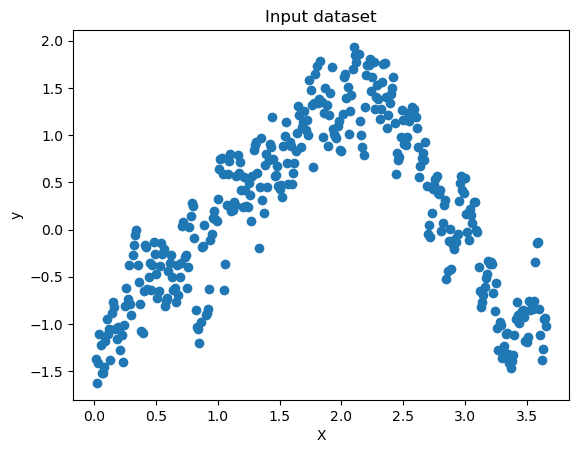

In [1553]:
# look at one year of temperature data over time

plt.scatter(x=index_366['index'], y=df_year_20['LJUBLJANA_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

plt.show()

In [1554]:
# check the min temperature

df_year_20['LJUBLJANA_temp_mean'].min()

-1.625113133193351

In [1555]:
# check the max temperature

df_year_20['LJUBLJANA_temp_mean'].max()

1.93493371135419

In [1556]:
# compute the loss function for the gradiant descent

def compute_cost(X, y, theta=np.array([[0],[0]])):
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [1557]:
compute_cost(X, y)

array([0.43300013])

In [1558]:
# gradiant descent function

def gradient_descent(X, y, theta=np.array([[0],[0]]), alpha=0.01, num_iterations=1500):
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        
        # print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [1559]:
%%time

# run the data through a gradiant descent for the starting conditions in 'theta_init'

num_iterations=10
theta_init=np.array([[0],[1]])
alpha=0.09
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init, alpha, num_iterations)

CPU times: user 12.5 ms, sys: 1.31 ms, total: 13.8 ms
Wall time: 4.8 ms


In [1560]:
theta

array([[-0.27340999],
       [ 0.213963  ]])

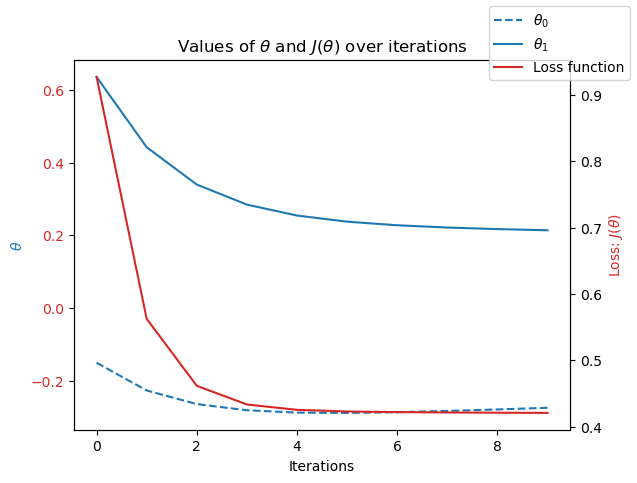

In [1561]:
# plot the loss, theta0, and theta1

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [1562]:
%%time

# theta range
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-10,10,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0

CPU times: user 1.56 s, sys: 34.6 ms, total: 1.6 s
Wall time: 1.26 s


In [1563]:
# show the loss function

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True, width=600, height=600, xaxis_title='theta0',  yaxis_title='theta1')
fig.show()

## 11. Ljubljana 1990

In [1565]:
# translate the chosen weather data into the X and y datasets needed for the optimisation function

X=index_365.to_numpy().reshape(n_rows_90,1)

# represent x_0 as a vector of 1s for vector computation

ones = np.ones((n_rows_90,1))
X = np.concatenate((ones, X), axis=1)
y=df_year_90['LJUBLJANA_temp_mean'].to_numpy().reshape(n_rows_90,1)

In [1566]:
X.shape, y.shape

((365, 2), (365, 1))

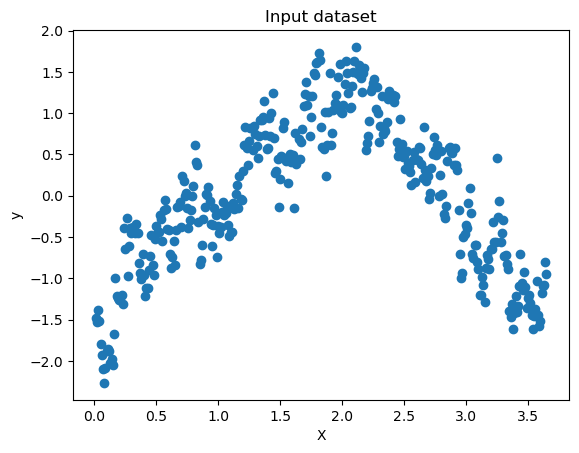

In [1567]:
# look at one year of temperature data over time

plt.scatter(x=index_365['index'], y=df_year_90['LJUBLJANA_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

plt.show()

In [1568]:
# check the min temperature

df_year_90['LJUBLJANA_temp_mean'].min()

-2.2668902854417174

In [1569]:
# check the max temperature

df_year_90['LJUBLJANA_temp_mean'].max()

1.8017346797554727

In [1570]:
# compute the loss function for the gradiant descent

def compute_cost(X, y, theta=np.array([[0],[0]])):
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [1571]:
compute_cost(X, y)

array([0.4146332])

In [1572]:
# gradiant descent function

def gradient_descent(X, y, theta=np.array([[0],[0]]), alpha=0.01, num_iterations=1500):
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        
        # print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [1573]:
%%time

# run the data through a gradiant descent for the starting conditions in 'theta_init'

num_iterations=30
theta_init=np.array([[0],[1]])
alpha=0.08
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init, alpha, num_iterations)

CPU times: user 34.5 ms, sys: 1.43 ms, total: 36 ms
Wall time: 11.9 ms


In [1574]:
theta

array([[-0.27666575],
       [ 0.13672154]])

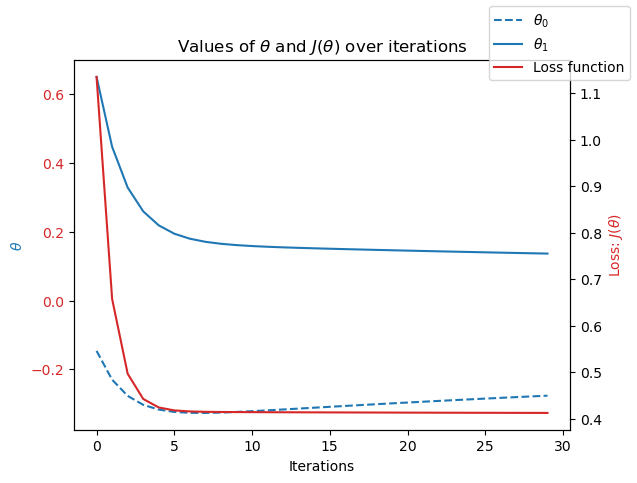

In [1575]:
# plot the loss, theta0, and theta1

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [1576]:
%%time

# theta range
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-10,10,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0

CPU times: user 1.4 s, sys: 15.6 ms, total: 1.42 s
Wall time: 1.12 s


In [1577]:
# show the loss function

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True, width=600, height=600, xaxis_title='theta0',  yaxis_title='theta1')
fig.show()

## 12. Ljubljana 1960

In [1579]:
# translate the chosen weather data into the X and y datasets needed for the optimisation function

X=index_366.to_numpy().reshape(n_rows_60,1)

# represent x_0 as a vector of 1s for vector computation

ones = np.ones((n_rows_60,1))
X = np.concatenate((ones, X), axis=1)
y=df_year_60['LJUBLJANA_temp_mean'].to_numpy().reshape(n_rows_60,1)

In [1580]:
X.shape, y.shape

((366, 2), (366, 1))

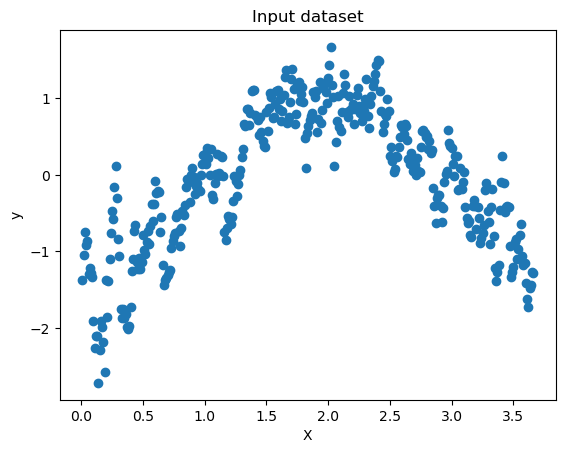

In [1581]:
# look at one year of temperature data over time

plt.scatter(x=index_366['index'], y=df_year_60['LJUBLJANA_temp_mean'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

plt.show()

In [1582]:
# check the min temperature

df_year_60['LJUBLJANA_temp_mean'].min()

-2.7149233917283127

In [1583]:
# check the max temperature

df_year_60['LJUBLJANA_temp_mean'].max()

1.668535648156755

In [1584]:
# compute the loss function for the gradiant descent

def compute_cost(X, y, theta=np.array([[0],[0]])):
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [1585]:
compute_cost(X, y)

array([0.41224621])

In [1586]:
# gradiant descent function

def gradient_descent(X, y, theta=np.array([[0],[0]]), alpha=0.01, num_iterations=1500):
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        
        # print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [1587]:
%%time

# run the data through a gradiant descent for the starting conditions in 'theta_init'

num_iterations=30
theta_init=np.array([[-5],[-1]])
alpha=0.1
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init, alpha, num_iterations)

CPU times: user 33.7 ms, sys: 1.14 ms, total: 34.8 ms
Wall time: 11.2 ms


In [1588]:
theta

array([[-2.25354809],
       [ 0.98248255]])

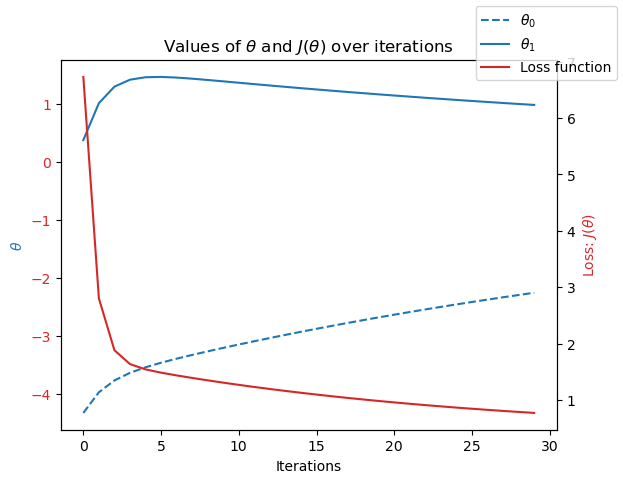

In [1589]:
# plot the loss, theta0, and theta1

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [1590]:
%%time

# theta range
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-10,10,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0

CPU times: user 1.59 s, sys: 24.9 ms, total: 1.62 s
Wall time: 1.2 s


In [1591]:
# show the loss function

#X = Theta0
#Y - Theta1
#Z = Loss

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True, width=600, height=600, xaxis_title='theta0',  yaxis_title='theta1')
fig.show()